#ُStep1: Importing Required Libraries

In [ ]:
!pip install pandas numpy matplotlib scikit-learn keras imbalanced-learn mpld3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 3.4 MB/s eta 0:00:00


In [ ]:
import keras
import numpy as np #handling datasets.
import pandas as pd
import matplotlib.pyplot as plt #visualization
import matplotlib.gridspec as gridspec
import mpld3 as mpl #interactive plots

from sklearn.model_selection import train_test_split, KFold #Splits dataset into training & testing.
from sklearn.linear_model import LogisticRegression #Different Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Step2: Loading and Preprocessing the Data

In [ ]:

df = pd.read_csv(r"/content/data.csv", header=0)

In [ ]:
df.drop('id', axis=1, inplace=True)
df.drop('Unnamed: 32', axis=1, inplace=True)

The id column and an unnamed column are removed since they are not useful for prediction.

Converting Labels to Numeric Form

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

#Step3: Exploratory Data Analysis (EDA)

In [ ]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


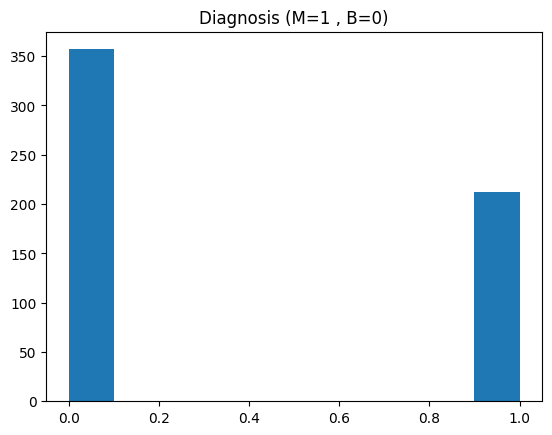

In [ ]:
# Visualizing Diagnosis Distribution
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

the count of malignant vs. benign cases.

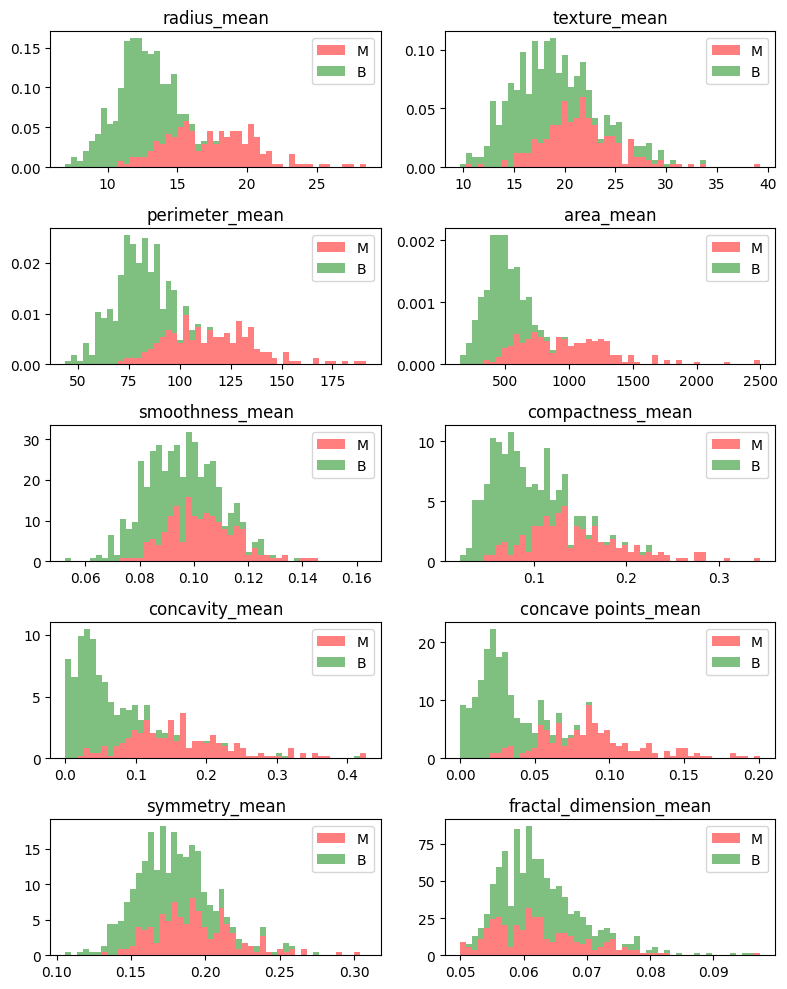

In [ ]:
# Feature-wise Data Distribution
features_mean = list(df.columns[1:11])
dfM = df[df['diagnosis'] == 1]
dfB = df[df['diagnosis'] == 0]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.figure
    binwidth = (max(df[features_mean[idx]]) - min(df[features_mean[idx]])) / 50
    ax.hist([dfM[features_mean[idx]], dfB[features_mean[idx]]],
            bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth),
            alpha=0.5, stacked=True, density=True, label=['M', 'B'], color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()


Creates stacked histograms showing distribution of features for benign & malignant cases.
Helps identify patterns or features that differentiate the two classes.

# Step4: Data Preprocessing

In [ ]:
# Train-Test Split
X = df.loc[:, df.columns != 'diagnosis']
y = df.iloc[:, :1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41, shuffle=True)

In [ ]:
print("Unique samples in Train set:", len(set(map(tuple, X_train.to_numpy()))))
print("Unique samples in Test set:", len(set(map(tuple, X_test.to_numpy()))))


Unique samples in Train set: 455
Unique samples in Test set: 114


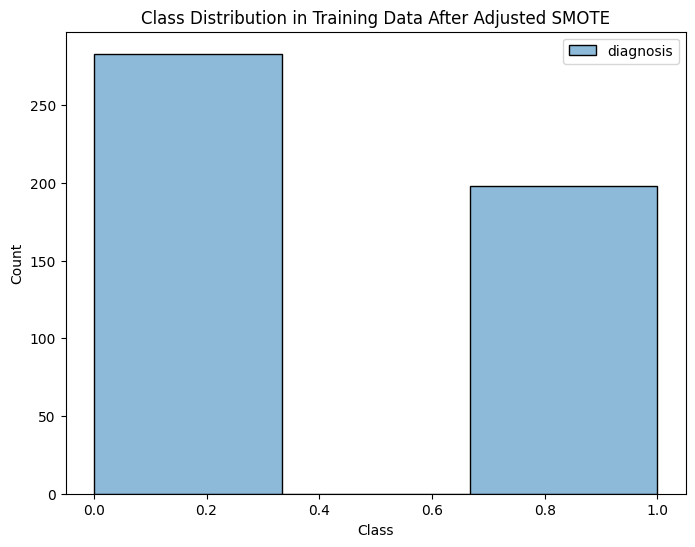

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=0.7, random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(y_res, kde=False, bins=3)
plt.title("Class Distribution in Training Data After Adjusted SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


# Step5: Model Evaluation Function

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}


#Step6: Machine Learning Models

Decision Tree

In [ ]:
from sklearn import tree

def sklearn_eval(X_train, y_train):
    dtc = tree.DecisionTreeClassifier(random_state=0)

    dtc.fit(X_train, y_train)
    dtc_eval = evaluate_model(dtc, X_test, y_test)
    # Print result
    print("...........")
    print("Results of Decision Tree test data: ")
    print('Accuracy:', dtc_eval['acc'])
    print('Precision:', dtc_eval['prec'])
    print('Recall:', dtc_eval['rec'])
    print('F1 Score:', dtc_eval['f1'])
    print('Cohens Kappa Score:', dtc_eval['kappa'])
    print('Area Under Curve:', dtc_eval['auc'])
    print('Confusion Matrix:\n', dtc_eval['cm'])


    return dtc
dtc = sklearn_eval(X_train, y_train)

...........
Results of Decision Tree test data: 
Accuracy: 0.9385964912280702
Precision: 0.8837209302325582
Recall: 0.95
F1 Score: 0.9156626506024096
Cohens Kappa Score: 0.8674858850880106
Area Under Curve: 0.9412162162162162
Confusion Matrix:
 [[69  5]
 [ 2 38]]


Random Forest

In [ ]:
def randomforest_eval(X_train, y_train):
    rf_clf = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=42, criterion='entropy')
    rf_clf.fit(X_train, y_train)
    rf_eval = evaluate_model(rf_clf, X_test, y_test)
    print("...........")
    print("Results of Radom Forest Test data: ")
    print('Accuracy:', rf_eval['acc'])
    print('Precision:', rf_eval['prec'])
    print('Recall:', rf_eval['rec'])
    print('F1 Score:', rf_eval['f1'])
    print('Cohens Kappa Score:', rf_eval['kappa'])
    print('Area Under Curve:', rf_eval['auc'])
    print('Confusion Matrix:\n', rf_eval['cm'])

    return rf_clf
rf_clf = randomforest_eval(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


...........
Results of Radom Forest Test data: 
Accuracy: 0.9824561403508771
Precision: 0.9523809523809523
Recall: 1.0
F1 Score: 0.975609756097561
Cohens Kappa Score: 0.9619238476953907
Area Under Curve: 0.9991554054054055
Confusion Matrix:
 [[72  2]
 [ 0 40]]


Naïve Bayes

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

def extra_trees_eval(X_train, y_train):
    et_clf = ExtraTreesClassifier(
    n_estimators=10,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=0.7,
    random_state=42
)
    et_clf.fit(X_train, y_train)
    et_eval = evaluate_model(et_clf, X_test, y_test)


    print("...........")
    print("Results of Extra Trees Test data: ")
    print('Accuracy:', et_eval['acc'])
    print('Precision:', et_eval['prec'])
    print('Recall:', et_eval['rec'])
    print('F1 Score:', et_eval['f1'])
    print('Cohens Kappa Score:', et_eval['kappa'])
    print('Area Under Curve:', et_eval['auc'])
    print('Confusion Matrix:\n', et_eval['cm'])

    return et_clf


et_clf = extra_trees_eval(X_train, y_train)


...........
Results of Extra Trees Test data: 
Accuracy: 0.9912280701754386
Precision: 0.975609756097561
Recall: 1.0
F1 Score: 0.9876543209876543
Cohens Kappa Score: 0.9808532079274437
Area Under Curve: 1.0
Confusion Matrix:
 [[73  1]
 [ 0 40]]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
train_acc = metrics.accuracy_score(y_train, et_clf.predict(X_train))
test_acc = metrics.accuracy_score(y_test, et_clf.predict(X_test))

print("Train Accuracy (Extra Trees):", train_acc)
print("Test Accuracy (Extra Trees):", test_acc)

Train Accuracy (Extra Trees): 0.9758241758241758
Test Accuracy (Extra Trees): 0.9912280701754386


In [ ]:
def naivebayes_eval(X_train, y_train):
    naive_bayes = GaussianNB()
    naive_bayes.fit(X_train , y_train)
    naive_eval = evaluate_model(naive_bayes, X_test, y_test)
    print("...........")
    print("Results of Naive Bayes Test data: ")
    print('Accuracy:', naive_eval['acc'])
    print('Precision:', naive_eval['prec'])
    print('Recall:', naive_eval['rec'])
    print('F1 Score:', naive_eval['f1'])
    print('Cohens Kappa Score:', naive_eval['kappa'])
    print('Area Under Curve:', naive_eval['auc'])
    print('Confusion Matrix:\n', naive_eval['cm'])

    return naive_bayes
naive_bayes = naivebayes_eval(X_train, y_train)

...........
Results of Naive Bayes Test data: 
Accuracy: 0.9649122807017544
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
Cohens Kappa Score: 0.922972972972973
Area Under Curve: 0.9962837837837838
Confusion Matrix:
 [[72  2]
 [ 2 38]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost

In [ ]:
def adaboost(X_train, y_train):
    abc = AdaBoostClassifier(n_estimators=5, learning_rate=0.5, random_state=42)
    ada_boost = abc.fit(X_train, y_train)
    ada_beval = evaluate_model(ada_boost, X_test, y_test)
    print("...........")
    print("Results of Adaboost Test data: ")
    print('Accuracy:', ada_beval['acc'])
    print('Precision:', ada_beval['prec'])
    print('Recall:', ada_beval['rec'])
    print('F1 Score:', ada_beval['f1'])
    print('Cohens Kappa Score:', ada_beval['kappa'])
    print('Area Under Curve:', ada_beval['auc'])
    print('Confusion Matrix:\n', ada_beval['cm'])

    return ada_boost
ada_boost = adaboost(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


...........
Results of Adaboost Test data: 
Accuracy: 0.956140350877193
Precision: 0.8888888888888888
Recall: 1.0
F1 Score: 0.9411764705882353
Cohens Kappa Score: 0.9064039408866995
Area Under Curve: 0.9925675675675677
Confusion Matrix:
 [[69  5]
 [ 0 40]]


In [ ]:
train_acc = metrics.accuracy_score(y_train, ada_boost.predict(X_train))
test_acc = metrics.accuracy_score(y_test, ada_boost.predict(X_test))

print("Train Accuracy (Adaboost):", train_acc)
print("Test Accuracy (Adaboost):", test_acc)

Train Accuracy (Adaboost): 0.967032967032967
Test Accuracy (Adaboost): 0.956140350877193


In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Class Balancement
bbc = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10, max_samples=0.7,
    max_features=0.7,
    sampling_strategy='auto',
    replacement=False,
    random_state=42
)


bbc.fit(X_train, y_train.values.ravel())


train_acc = metrics.accuracy_score(y_train, bbc.predict(X_train))
test_acc = metrics.accuracy_score(y_test, bbc.predict(X_test))

print("Train Accuracy (Balanced Bagging):", train_acc)
print("Test Accuracy (Balanced Bagging):", test_acc)


Train Accuracy (Balanced Bagging): 0.9824175824175824
Test Accuracy (Balanced Bagging): 0.9736842105263158


#Step7: Bootstrapping for Bagging (Ensemble Learning)

In [ ]:
from scipy.stats import mode

def majority_voting(X_test):
    pred_dt = dtc.predict(X_test)
    pred_rf = rf_clf.predict(X_test)
    pred_nb = naive_bayes.predict(X_test)
    pred_ada = ada_boost.predict(X_test)
    pred_et = et_clf.predict(X_test)
    pred_bbc= bbc.predict(X_test)


    predictions = np.array([pred_dt, pred_rf, pred_nb, pred_ada, pred_et])

    print("All Predictions Matrix Shape:", predictions.shape)
    print("Predictions Matrix:", predictions)


    final_predictions = mode(predictions, axis=0).mode


    final_predictions = np.squeeze(final_predictions)

    print("Final Predictions after Voting:", final_predictions)

    return final_predictions


In [ ]:
final_preds = majority_voting(X_test)
final_accuracy = metrics.accuracy_score(y_test, final_preds)
print("Final Ensemble Model Accuracy:", final_accuracy)


All Predictions Matrix Shape: (5, 114)
Predictions Matrix: [[0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1
  0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0
  1 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1
  0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0
  1 0 0 0 0 0]
 [0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1
  0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0
  1 0 0 0 0 0]
 [0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1
  0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0
  1 0 0 